<a href="https://colab.research.google.com/github/Yashwini-13/GEN-AI/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("kandij/mall-customers")

csv_path = os.path.join(path, "Mall_Customers.csv")
dt = pd.read_csv(csv_path)
dt.head()

100%|██████████| 1.56k/1.56k [00:00<00:00, 2.04MB/s]

Extracting files...


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


slicing...to convert to numpy use .values

In [2]:
x = dt.iloc[:, [3,4]].values

In [4]:
from sklearn.cluster import KMeans
errors = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

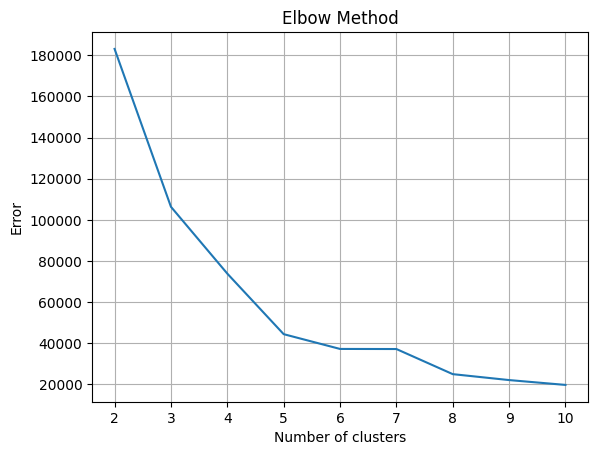

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

since there is a gradual decrease at 5 then the no of clusters or groups is 5(if the groups is not given )(min 5 max whatever)

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=5)

creating a column named group

In [8]:
dt['group'] = kmeans.predict(x)

In [9]:
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

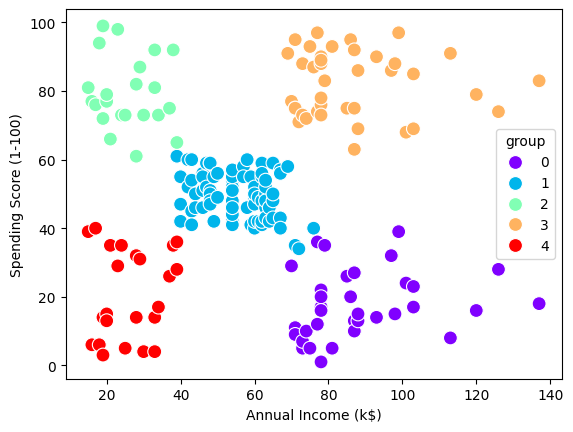

In [10]:
import seaborn as sns
sns.scatterplot(x=dt['Annual Income (k$)'], y=dt['Spending Score (1-100)'], hue=dt['group'], palette='rainbow' , s = 100)

the grp 4 very low amt spending grp.....
the grp 1 can recommend budget friendly products......
the grp 3 high annual income high spending money....
etc

In [11]:
dt[dt['group']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3
131,132,Male,39,71,75,3
133,134,Female,31,72,71,3
135,136,Female,29,73,88,3
137,138,Male,32,73,73,3
139,140,Female,35,74,72,3
141,142,Male,32,75,93,3


fetching the grp 3 details

In [12]:
kmeans.predict([[30,25]])

array([4], dtype=int32)

In [15]:
print("Group:",kmeans.predict([[70,80]])[0])

Group: 3


In [16]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

we can get actual optimal ranges